In [1]:
import sys
import os
import json
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from IPython import display
from sklearn.model_selection import train_test_split

from chemicalchecker import ChemicalChecker 
from chemicalchecker.core import DataSignature
from chemicalchecker.util import Config

ChemicalChecker.set_verbosity('DEBUG')
%matplotlib inline

2022-07-22 09:42:14,499 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] Logging level DEBUG for logger 'chemicalchecker'.


In [2]:
data_path = "/aloy/web_checker/package_cc/2021_07/sign_links"
local_cc_dir = "/aloy/home/mlocatelli/code/local_cc_complete/"
# Our local cc instance
cc_local = ChemicalChecker(local_cc_dir, custom_data_path=data_path)

2022-07-22 09:53:50,824 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-22 09:53:53,691 chemicalchecker.core.chemcheck.ChemicalChecker [INFO    ] CC root directory exists: ignoring 'custom_data_path'.


In [3]:
# read in chembl antibiotics for benchmark
chembl_antibiotics_df = pd.read_csv('../data/chembl_antobiotics_inchikeys_df.csv')

In [3]:
dataset = 'M1.001'

In [4]:
# Load the raw continuous data (scaled, log-transformed p-values)
# Rows: inchikeys
# Columns: bacterial/yeast strains

inputFile = "../data/maier_spitzer_matrix_log10_transformed_scaled_pvals_filtered_minimal_effect.csv"

df = pd.read_csv(inputFile, index_col = 'InChiKey').drop(['Unnamed: 0'], axis=1)

In [9]:
df.shape

(623, 52)

/opt/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


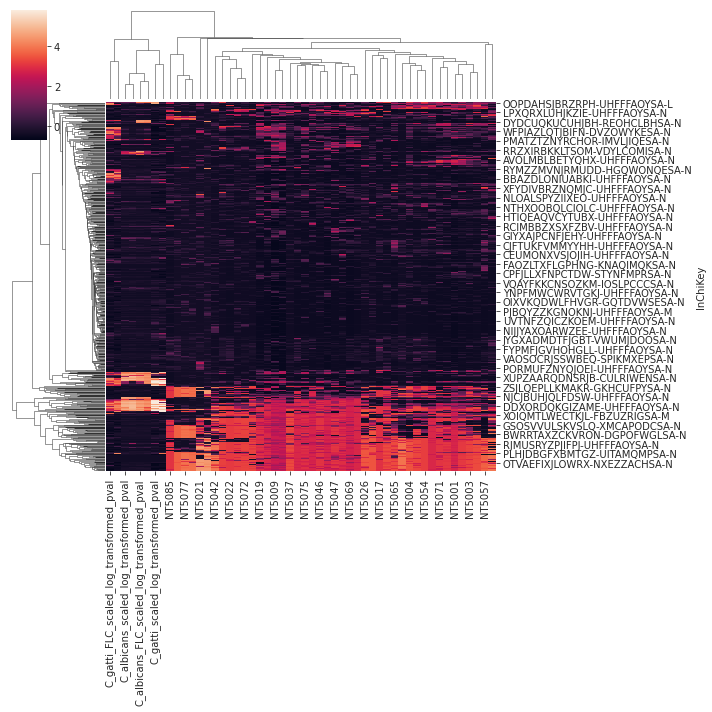

In [7]:
g = sns.clustermap(df)

### Signature 0

In [8]:
sign0 = cc_local.signature(dataset,'sign0')
sign0.clear_all()
sign0.fit(X=df.values, keys=list(df.index), features=list(df.columns), do_triplets=False, overwrite=True, sanitize=True, validations=False)

2022-07-14 09:34:50.949654: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-14 09:34:54,694 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign0
2022-07-14 09:34:54,748 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.001/sign0
2022-07-14 09:34:54,773 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.001/sign0
2022-07-14 09:34:54,847 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign0
2022-07-14 09:34:54,848 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/full/M/

In [9]:
sign0 = cc_local.signature(dataset,'sign0')
sign0.shape

2022-07-14 09:35:04,246 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign0


(623, 52)

2022-07-14 09:35:06,626 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign0
2022-07-14 09:35:06,627 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-14 09:35:08,420 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-14 09:35:08,422 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-14 09:35:08,434 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Full dataset sampled (n=623)
2022-07-14 09:35:08,435 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
2022-07-14 09:35:08,443 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign0/diags/local_cc_complete_sign0/subsampled_data.pkl
2022-07-14 09:35:08,456 chemicalchecke

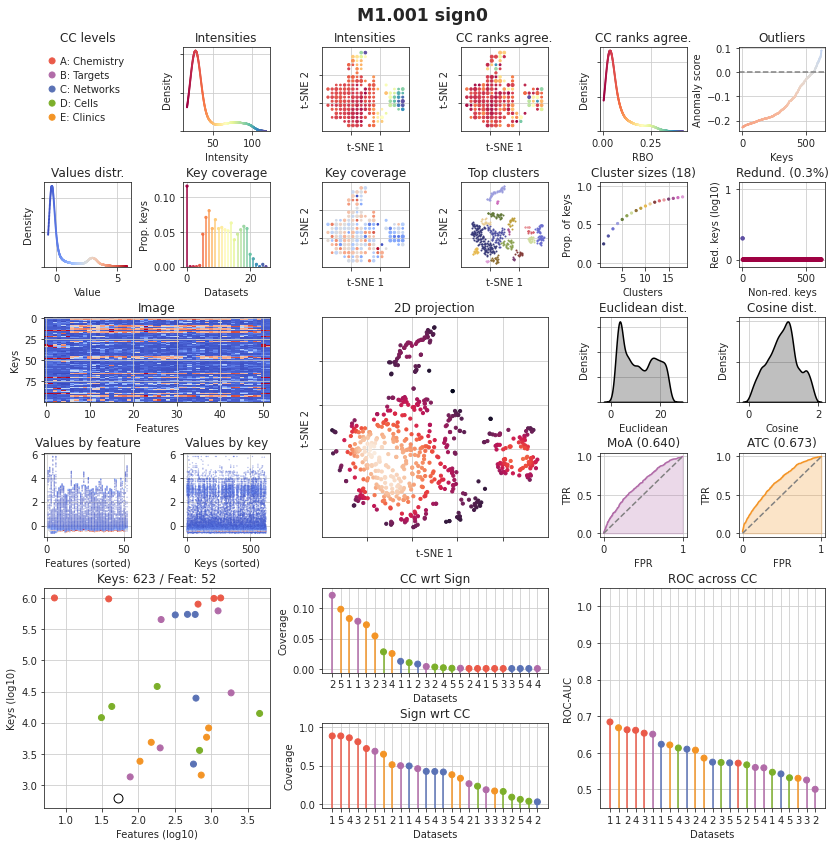

In [10]:
# Sign0 diagnostic plots
sign0 = cc_local.signature(dataset, 'sign0')
diag0 = sign0.diagnosis(ref_cctype='sign0')
diag0.canvas_medium()

In [11]:
sign0 = cc_local.signature(dataset, 'sign0')
sign0.shape

2022-07-14 09:43:49,637 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign0


(623, 52)

### Signature 1

In [12]:
sign0 = cc_local.signature(dataset, 'sign0')
sign1 = cc_local.signature(dataset, 'sign1')
sign1.clear_all()

sign1.fit(sign0, overwrite=True, validations=False, metric_learning=False)

2022-07-14 09:43:54,562 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign0
2022-07-14 09:43:54,565 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign1
2022-07-14 09:43:54,570 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.001/sign1
2022-07-14 09:43:54,596 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.001/sign1
2022-07-14 09:43:54,689 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign1
2022-07-14 09:43:54,691 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code

In [13]:
sign1 = cc_local.signature(dataset, 'sign1')
sign1.shape

2022-07-14 09:44:13,819 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign1


(623, 13)

In [14]:
sign1_ref = cc_local.get_signature('sign1', 'reference', dataset)
sign1_ref.shape

2022-07-14 09:44:14,956 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.001/sign1


(621, 13)

2022-07-14 09:44:16,345 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign1
2022-07-14 09:44:16,347 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-14 09:44:16,706 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-14 09:44:16,708 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-14 09:44:16,739 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Full dataset sampled (n=623)
2022-07-14 09:44:16,739 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
2022-07-14 09:44:16,748 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign1/diags/local_cc_complete_sign0/subsampled_data.pkl
2022-07-14 09:44:16,774 chemicalchecke

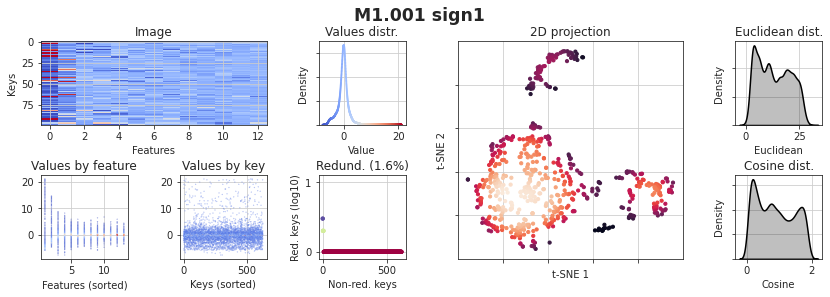

In [15]:
# Sign1 diagnostic plots
sign1 = cc_local.signature(dataset, 'sign1')
diag1 = sign1.diagnosis(ref_cctype='sign0')
diag1.canvas_small()

#### Signature 1 neighbors

In [16]:
sign1 = cc_local.signature(dataset, 'sign1')
neig1 = cc_local.signature(dataset, 'neig1')
neig1.clear_all()
neig1.fit(sign1)

2022-07-14 09:44:25,275 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign1
2022-07-14 09:44:25,276 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/neig1
2022-07-14 09:44:25,278 chemicalchecker.core.neig.neig [DEBUG   ] signature path is: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/neig1
2022-07-14 09:44:25,279 chemicalchecker.core.neig.neig [DEBUG   ] data_path: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/neig1/neig.h5
2022-07-14 09:44:25,307 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.001/neig1
2022-07-14 09:44:25,321 chemicalchecker.core.neig.neig [DEBUG   ] signature path is: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.001/neig1
2022-07-14 09:4

### Signature 2

In [17]:
sign2 = cc_local.signature(dataset,'sign2')
sign2.clear_all()
# TODO: check here if fit has to run on reference
sign2_ref = cc_local.get_signature('sign2','reference',dataset)
sign1 = cc_local.signature(dataset, 'sign1')
neig1 = cc_local.signature(dataset, 'neig1')
sign2_ref.fit(sign1,neig1, oos_predictor=False, overwrite=True, validations=False)

2022-07-14 09:44:28,530 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign2
2022-07-14 09:44:28,560 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.001/sign2
2022-07-14 09:44:28,577 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.001/sign2
2022-07-14 09:44:28,681 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign2
2022-07-14 09:44:28,682 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign2
2022-07-14 09:44:28,745 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code

In [18]:
sign2 = cc_local.signature(dataset,'sign2')
sign2.shape

2022-07-14 09:51:21,690 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign2


(623, 128)

2022-07-14 09:51:22,933 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign2
2022-07-14 09:51:22,935 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-14 09:51:23,078 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-14 09:51:23,080 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-14 09:51:23,089 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Full dataset sampled (n=623)
2022-07-14 09:51:23,090 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
2022-07-14 09:51:23,099 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign2/diags/local_cc_complete_sign0/subsampled_data.pkl
2022-07-14 09:51:23,115 chemicalchecke

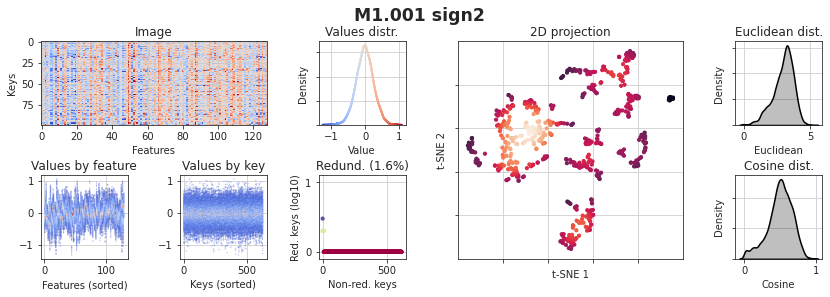

In [19]:
sign2 = cc_local.signature(dataset, 'sign2')
diag2 = sign2.diagnosis(ref_cctype='sign0')
diag2.canvas_small()

2022-07-14 09:51:30,936 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-14 09:51:30,938 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign0
2022-07-14 09:51:33,502 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign0
2022-07-14 09:51:33,535 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 623 rows from dataset V
2022-07-14 09:51:33,984 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 623 rows from dataset V


<AxesSubplot:title={'center':'AUROC (0.891)'}, xlabel='FPR', ylabel='TPR'>

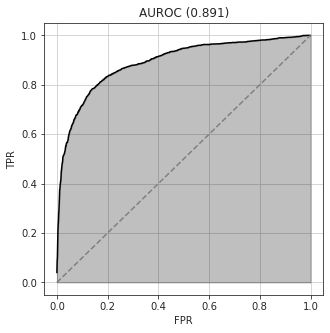

In [20]:
diag2.roc(dataset, 'sign0', plot=True, save=False)

In [21]:
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

X, keys = diag2._get_signatures(keys=df.index.values, axis=None, max_keys=100000)
X = PCA(n_components=100).fit_transform(X)
init = PCA(n_components=2).fit_transform(X)
perp = int(np.sqrt(X.shape[0]))
perp = np.max([5, perp])
perp = np.min([50, perp])
print(perp)
tsne = TSNE(perplexity=perp, init=init, n_jobs=diag2.cpu)
P_ = tsne.fit_transform(X)
P = P_[:len(keys)]

maier_anno_df = pd.read_csv('../data/maier_anno_inchikey_df.csv')
maier_anno_df = maier_anno_df.set_index(maier_anno_df['InChiKey'].values)
p_data = pd.DataFrame(P, index=keys, columns=['V1', 'V2'])
p_data = p_data.join(maier_anno_df)

2022-07-14 09:51:39,024 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 623 keys found
2022-07-14 09:51:39,026 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-14 09:51:39,026 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 623 rows from dataset V


24


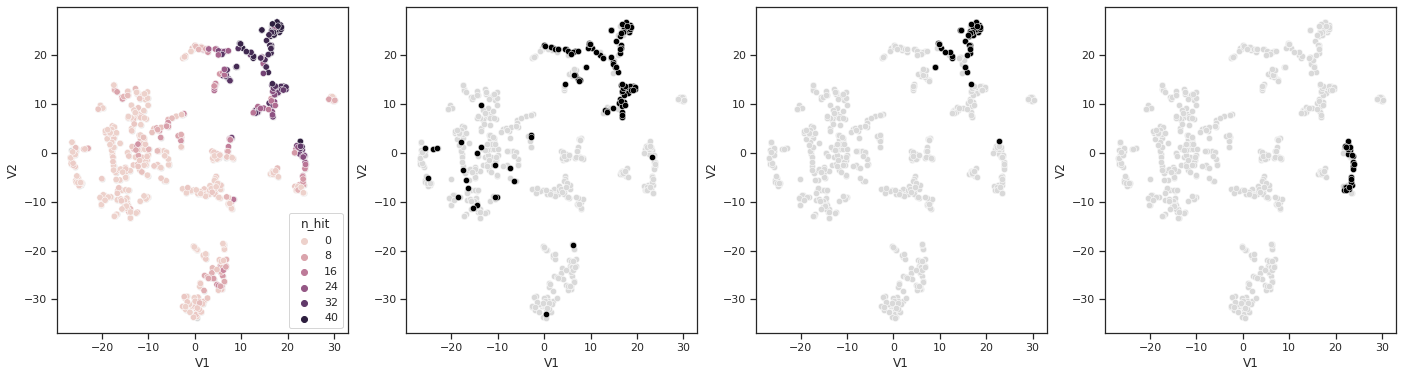

In [22]:
top_fungicidals_anno_df = pd.read_csv('../data/top30_fungicidal_inchikeys_spitzer.csv')

sns.set(rc={"figure.figsize":(24, 6)})
sns.set_theme(style="ticks")

fig, ax =plt.subplots(1,4)
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=40, hue='n_hit',ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data['drug_class']=='antibiotics'], s=40, color="0", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data['n_hit'] > 35], s=40, color="0", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[3])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(top_fungicidals_anno_df['InChiKey'])], s=40, color="0", ax=ax[3])
fig.show()

### Signature 3

In [35]:
sign3 = cc_local.signature(dataset, 'sign3')
sign3.clear_all()

2022-07-14 10:02:02,408 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign3
2022-07-14 10:02:02,411 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign1
2022-07-14 10:02:02,415 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.001/sign1
2022-07-14 10:02:02,417 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.001/sign1
2022-07-14 10:02:02,418 chemicalchecker.core.sign1.sign1 [DEBUG   ] Reading triplets
2022-07-14 10:02:02,418 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.001/sign1
2022-07-14 10:02:02,419 chemicalchecker.

In [36]:
sign2_list = list()
for ds in cc_local.coordinates:
    ds += '.001'
    sign2_list.append(cc_local.get_signature('sign2', 'full', ds))
# adding new space to CC
sign2_list.append(cc_local.get_signature('sign2','full',dataset))

2022-07-14 10:02:03,688 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A1/A1.001/sign2
2022-07-14 10:02:03,691 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A2/A2.001/sign2
2022-07-14 10:02:03,694 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A3/A3.001/sign2
2022-07-14 10:02:03,697 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A4/A4.001/sign2
2022-07-14 10:02:03,700 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A5/A5.001/sign2
2022-07-14 10:02:03,703 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_

In [37]:
sign2_self = cc_local.signature(dataset, 'sign2')
sign1_self = cc_local.signature(dataset, 'sign1')

2022-07-14 10:02:05,699 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign2
2022-07-14 10:02:05,700 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign1


In [38]:
sign3.fit_hpc(sign2_list, sign2_self, sign1_self, None, 'full', None, cpu=8, mem_by_core=4, plots_train=False)

2022-07-14 10:02:08,271 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] CC_Config for function fit is: /aloy/home/nkurzawa/cc_config.json
2022-07-14 10:02:08,272 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/nkurzawa/cc_config.json
2022-07-14 10:02:08,295 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] HPC system to use: sge
2022-07-14 10:02:08,296 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] initializing object sge
2022-07-14 10:02:10,217 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job name is: sign3_fit_hpc.py
2022-07-14 10:02:10,217 chemicalchecker.util.hpc.sge.sge [INFO    ] Writing file /aloy/scratch/nkurzawa/tmp_jobs/tmp_kyvy3new/job-sign3_fit_hpc.py.sh...
2022-07-14 10:02:10,220 chemicalchecker.util.hpc.sge.sge [DEBUG   ] HPC submission: qsub -terse  -q all.q /aloy/scratch/nkurzawa/tmp_jobs/tmp_kyvy3new/job-sign3_fit_hpc.py.sh
2022-07-14 10:02:12,668 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job id: 766943


2022-07-15 09:26:33.521884: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-15 09:26:39,004 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign3
2022-07-15 09:26:39,007 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-15 09:26:39,199 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-15 09:26:39,202 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign0
2022-07-15 09:26:43,931 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign0
2022-07-15 09:26:46,548 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 623 rows

<AxesSubplot:title={'center':'AUROC (0.671)'}, xlabel='FPR', ylabel='TPR'>

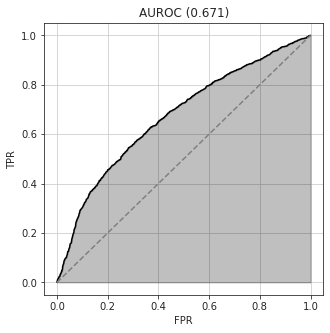

In [6]:
sign3 = cc_local.signature(dataset, 'sign3')
diag3 = sign3.diagnosis()
diag3.roc(dataset, 'sign0', save=False, plot=True)

#### Using manual triplets

In [7]:
s2 = cc_local.signature(dataset,'sign2')

2022-07-15 09:27:07,543 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign2


In [8]:
ink_pos = dict(zip(s2.keys, np.arange(len(s2.keys))))

In [9]:
s2_train_mat = DataSignature('/aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign3/models/train.h5')

In [10]:
s2_train_mat.info_h5

{'keys': (623,), 'x': (623, 3328)}

In [11]:
triplet_ink_matrix = s2_train_mat.get_h5_dataset('x')

2022-07-15 09:28:26,058 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset x


In [12]:
triplet_ink_matrix

array([[-0.15185289,  0.06739662, -0.43352956, ...,  0.233543  ,
        -0.961857  ,  0.107306  ],
       [-0.1314655 , -0.02174991, -0.07204469, ...,  0.235209  ,
        -0.0402175 ,  0.206492  ],
       [-0.16515848,  0.14874071, -0.4173473 , ...,  0.301223  ,
        -0.102329  ,  0.205719  ],
       ...,
       [-0.08134206,  0.00610325, -0.19760148, ...,  0.244498  ,
        -0.70279   ,  0.00171427],
       [-0.03860565,  0.3449781 , -0.19644822, ...,  0.209272  ,
        -0.0748999 ,  0.220704  ],
       [-0.39090768,  0.10366904,  0.22041193, ...,  0.262864  ,
        -0.655401  ,  0.327602  ]], dtype=float32)

In [13]:
triplet_ink_keys = s2_train_mat.get_h5_dataset('keys')

2022-07-15 09:28:56,878 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset keys


In [14]:
manual_triplets = pd.read_csv('./maier_spitzer_fil_full_triplets.tsv.gz', sep='\t')

In [15]:
manual_triplets['anchor'].values

array(['AADCDMQTJNYOSS-LBPRGKRZSA-N', 'AADCDMQTJNYOSS-LBPRGKRZSA-N',
       'AADCDMQTJNYOSS-LBPRGKRZSA-N', ..., 'ZYSCHNVPUOSLNC-BTJKTKAUSA-N',
       'ZYSCHNVPUOSLNC-BTJKTKAUSA-N', 'ZYSCHNVPUOSLNC-BTJKTKAUSA-N'],
      dtype=object)

In [16]:
triplet_array = np.vectorize(ink_pos.get)(manual_triplets.values)

In [17]:
triplet_array

array([[  0,  19,   3],
       [  0,  19,  31],
       [  0,  19,  35],
       ...,
       [622, 601, 541],
       [622, 601, 541],
       [622, 601, 619]])

In [18]:
sign3 = cc_local.signature(dataset, 'sign3')
sign3.clear_all()

2022-07-15 09:30:54,359 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign3
2022-07-15 09:30:54,363 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.001/sign3
2022-07-15 09:30:54,367 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.001/sign3
2022-07-15 09:30:54,423 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign3
2022-07-15 09:30:54,423 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign3


In [19]:
from chemicalchecker.util.splitter import NeighborTripletTraintest

In [20]:
NeighborTripletTraintest.precomputed_triplets(X=triplet_ink_matrix, ink_keys=triplet_ink_keys, triplets=triplet_array, 
                    out_file='/aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign3/models/traintest_eval.h5')

[INFO    ] Loading faiss with AVX2 support.
[INFO    ] Successfully loaded faiss with AVX2 support.
2022-07-15 09:31:03,064 chemicalchecker.util.splitter.neighbortriplet.NeighborTripletTraintest [INFO    ] Traintest saving to /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign3/models/traintest_eval.h5
2022-07-15 09:31:04,697 chemicalchecker.util.splitter.neighbortriplet.NeighborTripletTraintest [INFO    ] NeighborTripletTraintest saved to /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign3/models/traintest_eval.h5


In [21]:
NeighborTripletTraintest.precomputed_triplets(X=triplet_ink_matrix, ink_keys=triplet_ink_keys, triplets=triplet_array, split_names=['train'], split_fractions=[1.0], suffix='final',
                    out_file='/aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign3/models/traintest_final.h5')

2022-07-15 09:31:07,934 chemicalchecker.util.splitter.neighbortriplet.NeighborTripletTraintest [INFO    ] Traintest saving to /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign3/models/traintest_final.h5
2022-07-15 09:31:08,638 chemicalchecker.util.splitter.neighbortriplet.NeighborTripletTraintest [INFO    ] NeighborTripletTraintest saved to /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign3/models/traintest_final.h5


In [22]:
sign2_list = list()
for ds in cc_local.coordinates:
    ds += '.001'
    sign2_list.append(cc_local.get_signature('sign2', 'full', ds))
# adding new space to CC
sign2_list.append(cc_local.get_signature('sign2','full',dataset))

2022-07-15 09:31:13,651 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A1/A1.001/sign2
2022-07-15 09:31:13,655 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A2/A2.001/sign2
2022-07-15 09:31:13,658 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A3/A3.001/sign2
2022-07-15 09:31:13,661 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A4/A4.001/sign2
2022-07-15 09:31:13,664 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/A/A5/A5.001/sign2
2022-07-15 09:31:13,668 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_

In [23]:
sign2_self = cc_local.signature(dataset, 'sign2')
sign1_self = cc_local.signature(dataset, 'sign1')

2022-07-15 09:31:21,242 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign2
2022-07-15 09:31:21,244 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign1


In [24]:
sign3.fit_hpc(sign2_list, sign2_self, sign1_self, None, 'full', None, cpu=8, mem_by_core=4, plots_train=False)

2022-07-15 09:31:31,430 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] CC_Config for function fit is: /aloy/home/nkurzawa/cc_config.json
2022-07-15 09:31:31,431 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/nkurzawa/cc_config.json
2022-07-15 09:31:31,548 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] HPC system to use: sge
2022-07-15 09:31:31,549 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] initializing object sge
2022-07-15 09:31:32,294 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job name is: sign3_fit_hpc.py
2022-07-15 09:31:32,297 chemicalchecker.util.hpc.sge.sge [INFO    ] Writing file /aloy/scratch/nkurzawa/tmp_jobs/tmp_bflwryo1/job-sign3_fit_hpc.py.sh...
2022-07-15 09:31:32,317 chemicalchecker.util.hpc.sge.sge [DEBUG   ] HPC submission: qsub -terse  -q all.q /aloy/scratch/nkurzawa/tmp_jobs/tmp_bflwryo1/job-sign3_fit_hpc.py.sh
2022-07-15 09:31:34,779 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job id: 766951


2022-07-18 09:40:24.107424: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-18 09:40:29,048 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign3
2022-07-18 09:40:29,073 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-18 09:40:29,267 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-18 09:40:29,269 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign0
2022-07-18 09:40:34,965 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign0
2022-07-18 09:40:38,462 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 623 rows

<AxesSubplot:title={'center':'AUROC (0.949)'}, xlabel='FPR', ylabel='TPR'>

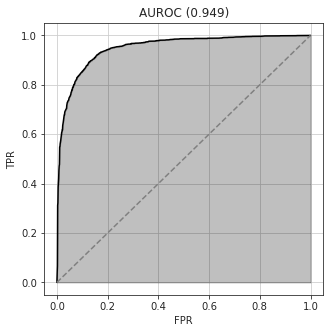

In [7]:
sign3 = cc_local.signature(dataset, 'sign3')
diag3 = sign3.diagnosis()
diag3.roc(dataset, 'sign0', save=False, plot=True)

2022-07-18 09:44:40,996 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-18 09:44:41,005 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Euclidean distances
2022-07-18 09:44:41,012 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Projection
2022-07-18 09:44:41,013 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fit-transforming t-SNE
2022-07-18 09:44:41,014 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] First doing a PCA
2022-07-18 09:44:41,125 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Chosen perplexity 50
2022-07-18 09:45:18,180 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Image
2022-07-18 09:45:18,190 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Features bins
2022-07-18 09:45:18,334 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Keys bins
2022-07-18 09:45:18,797 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Values
2022-07-18 09:45:18,983 chemicalchecker.core.diagnostics.Diagnosis [DEBUG

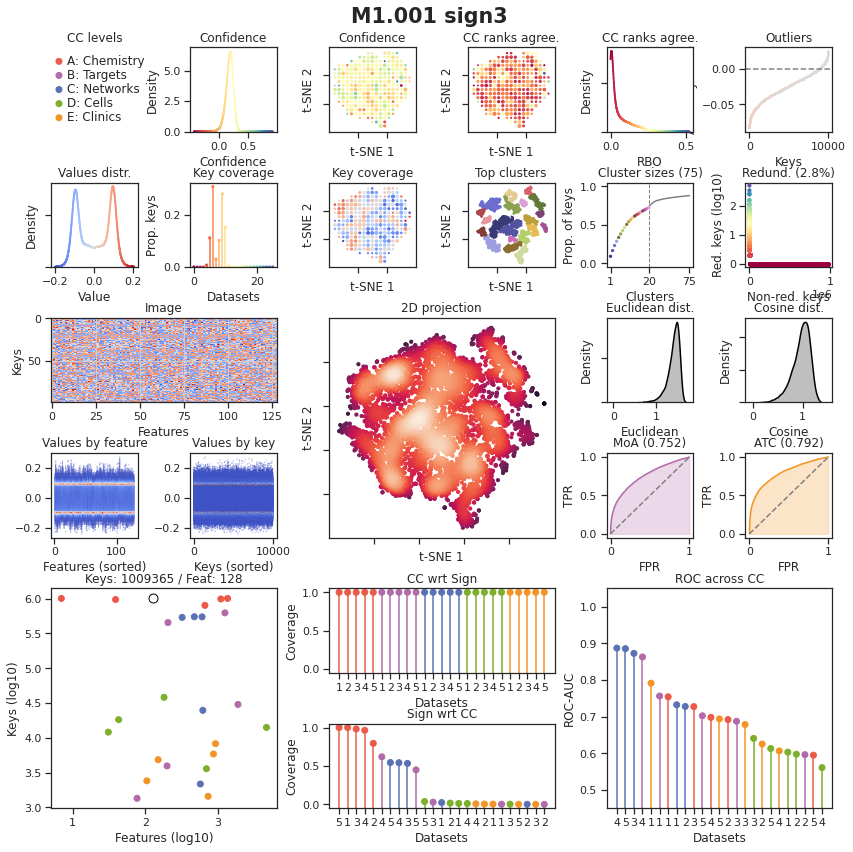

In [12]:
diag3.canvas_medium()

In [8]:
import random
random.seed(30)

X_orig, keys_orig = diag3._get_signatures(keys=df.index.values, max_keys=100000)
X_ab, keys_ab = diag3._get_signatures(keys=chembl_antibiotics_df['InChiKey'].values, max_keys=100000)
X_others, keys_others = diag3._get_signatures(keys=None, max_keys=100000)

from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

X, keys = diag3._get_signatures(keys=np.concatenate((keys_orig, keys_ab, keys_others), axis=None), max_keys=100000)
X = PCA(n_components=100).fit_transform(X)
init = PCA(n_components=2).fit_transform(X)
perp = int(np.sqrt(X.shape[0]))
perp = np.max([5, perp])
perp = np.min([50, perp])
print(perp)
tsne = TSNE(perplexity=perp, init=init, n_jobs=diag3.cpu)
P_ = tsne.fit_transform(X)
P = P_[:len(keys)]

maier_anno_df = pd.read_csv('../data/maier_anno_inchikey_df.csv')
maier_anno_df = maier_anno_df.set_index(maier_anno_df['InChiKey'].values)
p_data = pd.DataFrame(P, index=keys, columns=['V1', 'V2'])
p_data = p_data.join(maier_anno_df)

2022-07-18 09:43:04,159 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 623 keys found
2022-07-18 09:43:04,162 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-18 09:43:04,163 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 623 rows from dataset V
2022-07-18 09:43:08,803 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 245 keys found
2022-07-18 09:43:08,805 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-18 09:43:08,805 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 245 rows from dataset V
2022-07-18 09:43:12,200 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-18 09:43:12,201 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Subsampling dataset (n=10000)
2022-07-18 09:43:20,818 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/

50


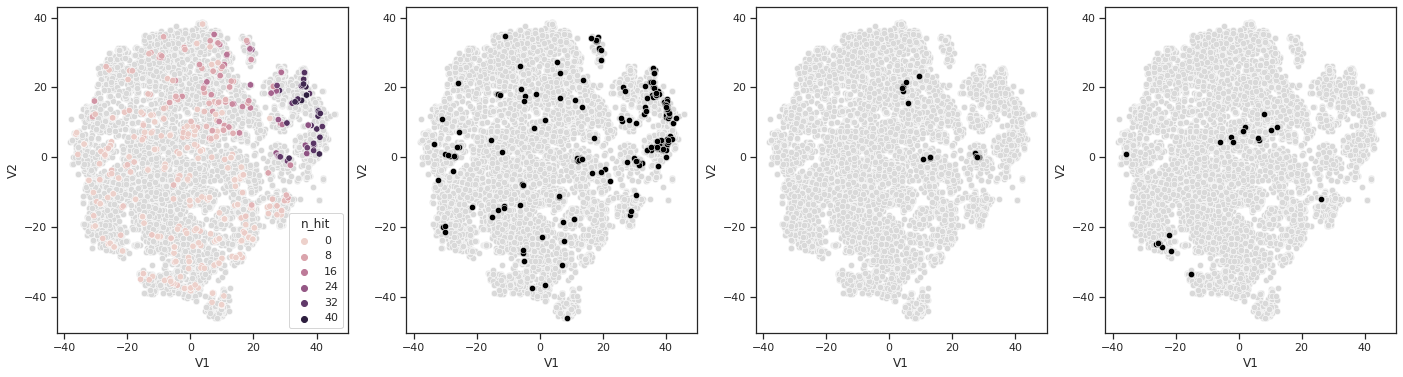

In [9]:
top_fungicidals_anno_df = pd.read_csv('../data/top30_fungicidal_inchikeys_spitzer.csv')
a_muciniphilia_anno_df = pd.read_csv('../data/amuciniphilia_inchikeys_df.csv')

sns.set(rc={"figure.figsize":(24, 6)})
sns.set_theme(style="ticks")

fig, ax =plt.subplots(1,4)
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=40, hue='n_hit',ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(chembl_antibiotics_df['InChiKey'])], s=40, color="0", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(top_fungicidals_anno_df['InChiKey'])], s=40, color="0", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[3])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(a_muciniphilia_anno_df['InChiKeys'])], s=40, color="0", ax=ax[3])
fig.show()

### Signature 4

In [10]:
sign4 = cc_local.signature(dataset, 'sign4')
sign4.clear_all()

2022-07-18 09:44:28,871 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign4
2022-07-18 09:44:28,890 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.001/sign4
2022-07-18 09:44:28,901 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/reference/M/M1/M1.001/sign4
2022-07-18 09:44:29,033 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign4
2022-07-18 09:44:29,035 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign4


In [11]:
sign4.fit_hpc(None,None,None,True,False,cpu=8, mem_by_core=8)

2022-07-18 09:44:30,735 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] CC_Config for function fit is: /aloy/home/nkurzawa/cc_config.json
2022-07-18 09:44:30,736 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/nkurzawa/cc_config.json
2022-07-18 09:44:30,776 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] HPC system to use: sge
2022-07-18 09:44:30,777 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] initializing object sge
2022-07-18 09:44:32,104 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job name is: sign4_fit_hpc.py
2022-07-18 09:44:32,105 chemicalchecker.util.hpc.sge.sge [INFO    ] Writing file /aloy/scratch/nkurzawa/tmp_jobs/tmp_4aq2pjg8/job-sign4_fit_hpc.py.sh...
2022-07-18 09:44:32,108 chemicalchecker.util.hpc.sge.sge [DEBUG   ] HPC submission: qsub -terse  -q all.q /aloy/scratch/nkurzawa/tmp_jobs/tmp_4aq2pjg8/job-sign4_fit_hpc.py.sh
2022-07-18 09:44:34,533 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job id: 766971


2022-07-21 11:56:05.362293: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-21 11:56:10,942 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign4
2022-07-21 11:56:10,945 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/mlocatelli/code/local_cc_complete
2022-07-21 11:56:11,299 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] ROC
2022-07-21 11:56:11,302 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign0
2022-07-21 11:56:17,854 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign0
2022-07-21 11:56:22,336 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 551 rows

<AxesSubplot:title={'center':'AUROC (0.931)'}, xlabel='FPR', ylabel='TPR'>

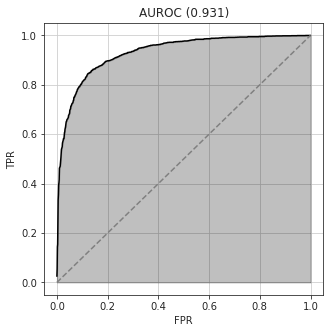

In [5]:
sign4 = cc_local.signature(dataset, 'sign4')
diag4 = sign4.diagnosis()
diag4.roc(dataset, 'sign0', save=False, plot=True)

2022-07-19 09:49:09,458 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2022-07-19 09:49:09,461 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2022-07-19 09:49:09,462 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Subsampling dataset (n=10000)
2022-07-19 09:49:23,088 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Saving signature subsample /aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign4/diags/local_cc_complete_sign0/subsampled_data.pkl
2022-07-19 09:49:23,244 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Euclidean distances
2022-07-19 09:49:23,252 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Projection
2022-07-19 09:49:23,295 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fit-transforming t-SNE
2022-07-19 09:49:23,296 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] First doing a PCA
2022-07-19 09:49:24,393 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Chose

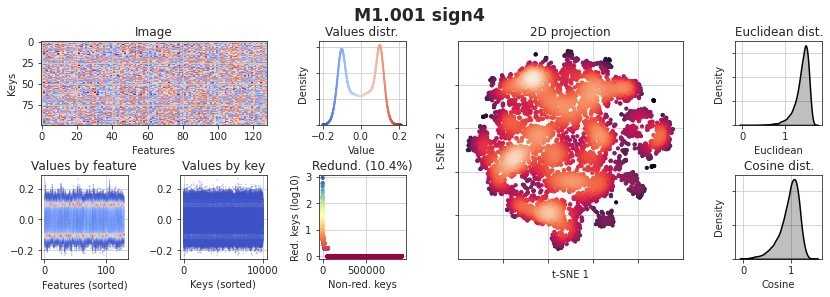

In [6]:
diag4.canvas_small()

In [10]:
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

X_orig, keys_orig = diag4._get_signatures(keys=df.index.values, max_keys=100000)

X_ab, keys_ab = diag4._get_signatures(keys=chembl_antibiotics_df['InChiKey'].values, max_keys=100000)
X_others, keys_others = diag4._get_signatures(keys=None, max_keys=100000)

X, keys = diag4._get_signatures(keys=np.concatenate((keys_orig, keys_ab, keys_others, 'FNOKZRYCHPSURW-WFXFPESJSA-N'), axis=None), 
                                max_keys=100000)
X_pca = PCA(n_components=100).fit_transform(X)
init = PCA(n_components=2).fit_transform(X_pca)
perp = int(np.sqrt(X.shape[0]))
perp = np.max([5, perp])
perp = np.min([50, perp])
print(perp)
tsne = TSNE(perplexity=perp, init=init, n_jobs=diag4.cpu)
P_ = tsne.fit_transform(X_pca)
P = P_[:len(keys)]

maier_anno_df = pd.read_csv('../data/maier_anno_inchikey_df.csv')
maier_anno_df = maier_anno_df.set_index(maier_anno_df['InChiKey'].values)
p_data = pd.DataFrame(P, index=keys, columns=['V1', 'V2'])
p_data = p_data.join(maier_anno_df)

2022-07-19 09:51:25,339 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 551 keys found
2022-07-19 09:51:25,340 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-19 09:51:25,341 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 551 rows from dataset V
2022-07-19 09:51:27,151 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 236 keys found
2022-07-19 09:51:27,152 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-19 09:51:27,152 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 236 rows from dataset V
2022-07-19 09:51:29,427 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] 10761 keys found
2022-07-19 09:51:29,437 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Fetching signatures
2022-07-19 09:51:29,438 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 10761 rows from dataset V


50


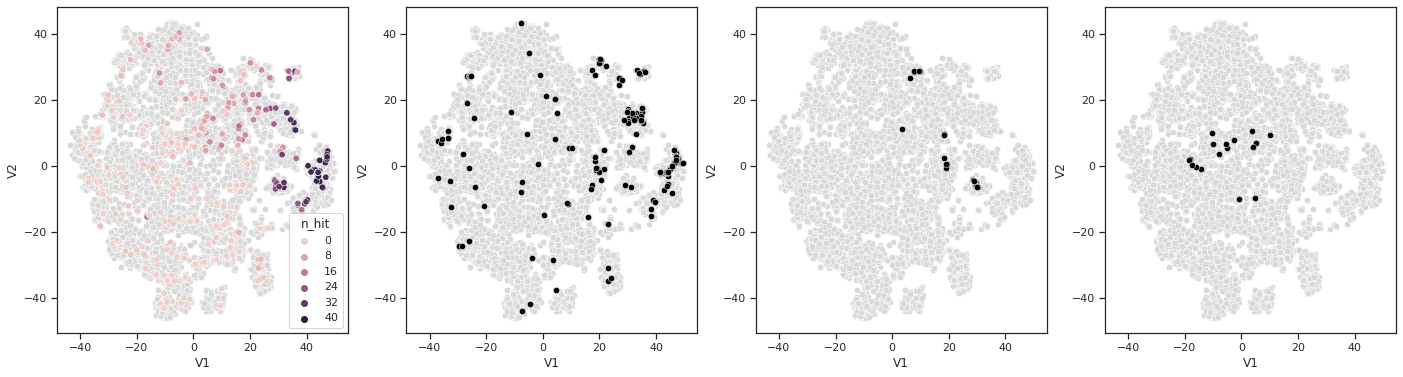

In [11]:
top_fungicidals_anno_df = pd.read_csv('../data/top30_fungicidal_inchikeys_spitzer.csv')
a_muciniphilia_anno_df = pd.read_csv('../data/amuciniphilia_inchikeys_df.csv')

sns.set(rc={"figure.figsize":(24, 6)})
sns.set_theme(style="ticks")

fig, ax =plt.subplots(1,4)
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=40, hue='n_hit',ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(chembl_antibiotics_df['InChiKey'])], s=40, color="0", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(top_fungicidals_anno_df['InChiKey'])], s=40, color="0", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[3])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(a_muciniphilia_anno_df['InChiKeys'])], s=40, color="0", ax=ax[3])
fig.show()

In [ ]:
# get sign4 values for all compounds of the original dataset
compound_mapping_df = pd.read_csv('../data/compound_name_smiles_inchi_df.csv')
df_smiles = compound_mapping_df[compound_mapping_df.InChiKey.isin(df.index)]['SMILES_id'].to_list()

dest_file = '../data/M1_001_sign4_data.h5'

sign4.predict_from_smiles(df_smiles, dest_file=dest_file)

In [13]:
# save as csv file
df_h5 = DataSignature(dest_file)
sign4_df = pd.DataFrame(df_h5.get_h5_dataset('V'))
sign4_df['SMILES_id'] = df_smiles
sign4_df = sign4_df.merge(compound_mapping_df, how='left', on='SMILES_id')
sign4_df.to_csv('../data/M1_001_sign4_data.csv')

2022-07-19 10:04:58,174 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V


In [6]:
sign4_df = pd.read_csv('../data/M1_001_sign4_data.csv')
sign4_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,123,124,125,126,127,SMILES_id,compound_ids,prestwick_id,compound_name,InChiKey
0,0,0.088575,-0.088574,0.087644,0.088565,0.088575,-0.088575,0.088575,-0.088458,0.088576,...,0.088576,0.088557,-0.088436,-0.088576,-0.088576,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4C(=O)C(=C5...,Prestw-1109_Rifabutin,Prestw-1109,Rifabutin,ZWBTYMGEBZUQTK-PVLSIAFMSA-N
1,1,0.092042,-0.089119,0.011305,0.091780,0.090678,-0.090765,0.092053,-0.047466,0.092057,...,0.091449,0.019439,-0.091999,-0.091940,-0.091761,[Cl-].C[C@@H]1[C@H]2[C@H](O)[C@H]3[C@H]([NH+](...,Prestw-1399_Doxycycline hydrochloride,Prestw-1399,Doxycycline hydrochloride,PTNZGHXUZDHMIQ-CVHRZJFOSA-N
2,2,0.088974,-0.087561,0.087103,0.088837,0.089249,-0.089285,0.089231,-0.084122,0.089388,...,0.089376,0.087767,-0.088545,-0.089347,-0.089342,[Cl-].CN(C)[C@H]1[C@@H]2C[C@H]3C(=C(O)c4c(O)cc...,Prestw-145_Chlortetracycline hydrochloride,Prestw-145,Chlortetracycline hydrochloride,QYAPHLRPFNSDNH-MRFRVZCGSA-N
3,3,0.088738,-0.088738,0.088693,0.088738,0.088739,-0.088738,0.087802,-0.088714,0.088739,...,0.088739,0.088733,-0.088735,-0.088738,-0.088739,[H+].O.[Cl-].NC1CCN(C1)c2nc3N(C=C(C(O)=O)C(=O)...,Prestw-1464_Tosufloxacin hydrochloride,Prestw-1464,Tosufloxacin hydrochloride,HIUQPJJYKJHGMT-UHFFFAOYSA-N
4,4,0.089350,-0.064032,0.089548,0.089574,0.089568,-0.089581,0.089578,-0.089478,0.089582,...,0.089581,0.089538,-0.089580,-0.089581,-0.089582,OCC(NC(=O)C(Cl)Cl)C(O)c1ccc(cc1)[N+]([O-])=O,Prestw-31_Chloramphenicol,Prestw-31,Chloramphenicol,WIIZWVCIJKGZOK-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,608,-0.021740,0.006804,-0.098687,-0.095013,-0.081465,0.092225,-0.106112,-0.102077,0.093968,...,-0.106971,0.103454,-0.108225,0.057736,-0.005136,CC(C(O)=O)c1ccc2c([nH]c3ccc(Cl)cc23)c1,Prestw-1261_Carprofen,Prestw-1261,Carprofen,PUXBGTOOZJQSKH-UHFFFAOYSA-N
609,609,0.098051,0.105068,0.106837,-0.062433,0.107387,0.028441,-0.096056,0.102478,-0.101855,...,-0.106233,0.097583,-0.070609,0.031073,0.054658,Cc1cccc(C)c1NC2=NCCCS2,Prestw-598_Xylazine,Prestw-598,Xylazine,BPICBUSOMSTKRF-UHFFFAOYSA-N
610,610,0.090665,0.092515,0.091619,-0.089628,-0.092022,-0.084745,0.091537,0.080566,0.092343,...,-0.074333,0.092486,-0.085010,0.092189,-0.091671,CCCCCC[C@@H]1[C@@H](OC(=O)CC(C)C)[C@H](C)OC(=O...,Prestw-222_Antimycin A,Prestw-222,Antimycin A,UIFFUZWRFRDZJC-SBOOETFBSA-N
611,611,-0.021544,-0.085224,0.100209,-0.105910,0.112144,-0.111128,-0.112619,0.110432,-0.083844,...,-0.079553,-0.111674,-0.053389,0.109804,0.025364,Nc1cc(C(Cl)=C(Cl)Cl)c(cc1[S](N)(=O)=O)[S](N)(=...,Prestw-540_Clorsulon,Prestw-540,Clorsulon,QOVTVIYTBRHADL-UHFFFAOYSA-N


## Generate Signaturizer

In [21]:
from signaturizer.exporter import export_smilespred

In [23]:
export_smilespred(smilespred_path="/aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign4/models/smiles_final", 
                  destination="/aloy/home/nkurzawa/projects/01_microbial_CC_signatures/signaturizers/M1", 
                  applicability_path="/aloy/home/mlocatelli/code/local_cc_complete/full/M/M1/M1.001/sign4/models/smiles_applicability_final",
                  compress=False)

[WARNING ] FOR KERAS USERS: The object that you are saving contains one or more Keras models or layers. If you are loading the SavedModel with `tf.keras.models.load_model`, continue reading (otherwise, you may ignore the following instructions). Please change your code to save with `tf.keras.models.save_model` or `model.save`, and confirm that the file "keras.metadata" exists in the export directory. In the future, Keras will only load the SavedModels that have this file. In other words, `tf.saved_model.save` will no longer write SavedModels that can be recovered as Keras models (this will apply in TF 2.5).

FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
[INFO    ] Assets written to: /tmp/tmp9tectkkb/assets


In [4]:
from signaturizer import Signaturizer

2022-07-22 10:01:39.139258: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [5]:
signM1 = Signaturizer('/aloy/home/nkurzawa/projects/01_microbial_CC_signatures/signaturizers/M1/', local=True, verbose=True)

LOADING local: /aloy/home/nkurzawa/projects/01_microbial_CC_signatures/signaturizers/M1/


2022-07-22 10:01:49.621762: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /.singularity.d/libs
2022-07-22 10:01:49.621795: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-22 10:01:49.621815: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pessoa): /proc/driver/nvidia/version does not exist
2022-07-22 10:01:49.622065: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
smiles = ['C', 'CCC']
results = signM1.predict(smiles)

Parsing SMILES: 2it [00:00, 278.88it/s]
Generating signatures:   0%|                                                                                                                                                         | 0/1 [00:00<?, ?it/s]2022-07-21 12:43:32.433498: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-21 12:43:32.608308: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3092815000 Hz
Generating signatures: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.79s/it]

PREDICTION complete!


In [28]:
results.signature

array([[-0.06867649,  0.11840463,  0.13722043, -0.15113595, -0.03727543,
         0.11787144,  0.13292   ,  0.13373448, -0.11873996, -0.09060017,
         0.04325551, -0.01867492, -0.12389077, -0.11082219, -0.01620489,
         0.03119974, -0.05555797,  0.07510303,  0.01430772, -0.03527327,
         0.11029327,  0.04438736, -0.09336283,  0.14487693,  0.14031582,
        -0.1336498 , -0.08078517,  0.03852653,  0.03564202, -0.04844218,
        -0.00743585, -0.09993538, -0.03277802, -0.11910771, -0.12520148,
        -0.0420392 , -0.10520409,  0.05374294, -0.01916845, -0.02712272,
         0.04332153, -0.04196429, -0.1328669 , -0.13256879, -0.01599378,
         0.12336725, -0.01397826, -0.06209733, -0.1386683 , -0.11770044,
        -0.02714615, -0.12627554, -0.03083716,  0.10622049, -0.01856676,
         0.0169802 ,  0.02411186,  0.02476458,  0.1273774 ,  0.00040881,
        -0.09904777, -0.08937123, -0.14469528,  0.09353619, -0.00222732,
         0.00179747,  0.05208695, -0.14590397, -0.0

In [8]:
test_smiles = ['OCC(NC(=O)C(Cl)Cl)C(O)c1ccc(cc1)[N+]([O-])=O', 'CC(C(O)=O)c1ccc2c([nH]c3ccc(Cl)cc23)c1', 'Cc1cccc(C)c1NC2=NCCCS2']
test_results = signM1.predict(test_smiles)

Parsing SMILES: 3it [00:00, 123.15it/s]
Generating signatures:   0%|                                                                                                                                                                                            | 0/1 [00:00<?, ?it/s]2022-07-22 10:04:36.973051: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-22 10:04:36.992183: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3092815000 Hz
Generating signatures: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.20it/s]

PREDICTION complete!


In [10]:
test_results.signature[0,]

array([ 0.02915251, -0.06081597,  0.09356863,  0.09324653,  0.093103  ,
       -0.09366872,  0.09227484, -0.09304193,  0.09372065, -0.09366423,
        0.09351875,  0.08388969, -0.09371778, -0.09303864,  0.089884  ,
        0.09362597,  0.08909239, -0.0923907 ,  0.09207232,  0.09365851,
       -0.09368237, -0.09355042, -0.09371957,  0.08430748,  0.09276655,
       -0.09363509, -0.09031872,  0.09370445,  0.09371983, -0.09322294,
       -0.0540433 ,  0.09370131,  0.09370726,  0.09343065, -0.09341481,
        0.09371747,  0.09349934, -0.09356074,  0.09332065, -0.0933589 ,
       -0.0936878 ,  0.09300539, -0.09288034,  0.06359308,  0.09323163,
       -0.0934855 , -0.0936461 ,  0.09370404,  0.09370111,  0.0937129 ,
        0.09301851,  0.09366424,  0.08114584, -0.09371004, -0.09370477,
       -0.08589394, -0.0936682 ,  0.09369968, -0.09352078, -0.09288677,
        0.09365284,  0.09095608,  0.09329226,  0.09328213,  0.03610172,
        0.09371785,  0.08671796,  0.09236521, -0.09105676, -0.08

In [14]:
np.array(sign4_df.iloc[:,1:129][sign4_df['SMILES_id']=="OCC(NC(=O)C(Cl)Cl)C(O)c1ccc(cc1)[N+]([O-])=O"])[0]

array([ 0.08935016, -0.06403197,  0.08954838,  0.08957376,  0.08956836,
       -0.0895811 ,  0.0895778 , -0.08947805,  0.08958206, -0.08958199,
        0.08957969,  0.08941851, -0.08958206, -0.08947429,  0.08956665,
        0.0895817 ,  0.08957306, -0.08957413,  0.08952518,  0.08958057,
       -0.08958186, -0.08958137, -0.08958206,  0.063632  ,  0.08957347,
       -0.08958135, -0.08956489,  0.08958188,  0.08958206, -0.08955967,
       -0.08746129,  0.08958194,  0.08958203,  0.08955336, -0.08956891,
        0.08958206,  0.08958192, -0.08956153,  0.08955935, -0.08957811,
       -0.08958051,  0.08952114, -0.08957911,  0.08933727,  0.08957972,
       -0.0895742 , -0.08958156,  0.08958203,  0.08958098,  0.08958129,
        0.08957758,  0.08958092,  0.08913452, -0.08958206, -0.08957934,
        0.00804368, -0.08958159,  0.08957969, -0.08957975, -0.08957914,
        0.08958054,  0.08937608,  0.08958058,  0.08957525,  0.08922257,
        0.08958201,  0.08684582,  0.08951078, -0.08957925, -0.08

<AxesSubplot:>

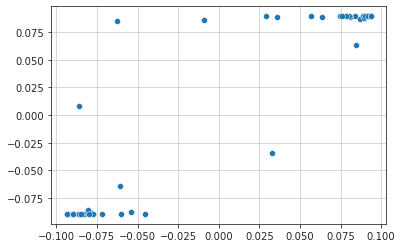

In [15]:
sns.scatterplot(test_results.signature[0,], np.array(sign4_df.iloc[:,1:129][sign4_df['SMILES_id']=="OCC(NC(=O)C(Cl)Cl)C(O)c1ccc(cc1)[N+]([O-])=O"])[0])

In [19]:
np.corrcoef(test_results.signature[0,], np.array(sign4_df.iloc[:,1:129][sign4_df['SMILES_id']=="OCC(NC(=O)C(Cl)Cl)C(O)c1ccc(cc1)[N+]([O-])=O"])[0])

array([[1.        , 0.97052988],
       [0.97052988, 1.        ]])

/opt/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

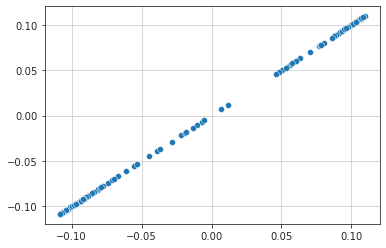

In [16]:
sns.scatterplot(test_results.signature[1,], np.array(sign4_df.iloc[:,1:129][sign4_df['SMILES_id']=="CC(C(O)=O)c1ccc2c([nH]c3ccc(Cl)cc23)c1"])[0])

/opt/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

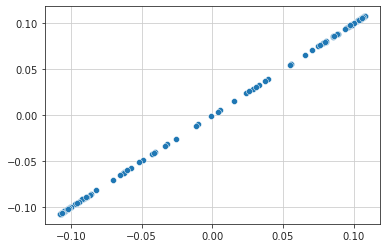

In [18]:
sns.scatterplot(test_results.signature[2,], np.array(sign4_df.iloc[:,1:129][sign4_df['SMILES_id']=="Cc1cccc(C)c1NC2=NCCCS2"])[0])

#### Signaturize FooDB

In [ ]:
# define h5 output file
foodb_dest_file = '/aloy/home/nkurzawa/projects/01_microbial_CC_signatures/code/signaturize_compound_libraries/data/M1_foodb.h5'

# load foodb compounds
dfc = pd.read_csv('../../signaturize_compound_libraries/data/foodb_repr.csv')
dfc = dfc.drop_duplicates()
lib_smiles = dfc.SMILES.tolist()

# perform prediction
sign4.predict_from_smiles(lib_smiles, dest_file=foodb_dest_file)

In [ ]:
# read in signatures
m1_foodb = DataSignature(foodb_dest_file)

# create DataFrame from array and add compound meta data
m1_sign_array = m1_foodb.get_h5_dataset('V')
m1_sign_df = dfc.reset_index().join(pd.DataFrame(m1_sign_array))

# write output file
m1_sign_df.to_csv('../data/m1_foodb_sign_df.csv')

In [29]:
m1_sign_foodb_df = pd.read_csv('../data/m1_foodb_sign_df.csv').drop(['Unnamed: 0'], axis=1).rename(columns = {'InChIKey':'InChiKey'}).set_index('InChiKey').drop(['index'], axis=1)

In [30]:
m1_sign_foodb_df.iloc[:,4:132]

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
InChiKey,,,,,,,,,,,,,,,,,,,,,
AAARRLVSWMMLIL-JFDCHTIYSA-N,0.073053,0.139665,0.044674,0.046085,-0.117927,-0.024912,0.127738,0.124537,0.071804,-0.009422,...,-0.080349,0.111526,-0.116701,-0.061369,0.023871,-0.018069,-0.070172,-0.075896,0.078339,0.083088
AAAUQAJYMBAEDN-SDYYSCIWSA-N,0.076405,0.145628,0.056373,0.034627,-0.121586,-0.031722,0.124988,0.127885,0.068448,-0.016725,...,-0.078279,0.108508,-0.122104,-0.044624,0.037099,-0.014882,-0.069048,-0.081330,0.082825,0.077184
AAAVAOYFDZROJH-ODEQYEIHSA-N,0.055829,0.147009,0.129916,-0.110976,-0.122010,0.099818,0.117596,0.139611,0.041143,-0.059790,...,-0.010028,0.078944,-0.064740,-0.083554,0.118771,0.030269,-0.076218,-0.061617,0.072870,0.041774
AAAYFFAGXKLUDV-AXAMJWTMSA-N,-0.011707,0.195780,0.113601,-0.132519,-0.154273,0.127182,0.085341,0.103871,0.077214,0.074575,...,-0.010400,0.122413,-0.114583,-0.052965,0.096500,0.078779,-0.010993,-0.024884,0.133609,-0.061050
AABORWYRSOFPIQ-NTOMMRJQSA-N,0.033798,0.113440,0.112800,-0.111409,-0.097554,0.110651,0.112763,0.113161,0.063043,-0.087602,...,0.039030,0.064979,-0.051109,-0.063508,0.111846,0.095208,-0.036123,-0.037887,0.071598,0.042319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DXYUAIFZCFRPTH-UHFFFAOYSA-N,0.137126,-0.133096,0.028303,0.127341,-0.037321,0.084817,-0.124752,-0.105640,-0.005853,-0.099889,...,0.019759,-0.107500,0.032461,0.121643,0.023270,0.096302,0.145283,-0.041256,0.021053,-0.136005
GOMNOOKGLZYEJT-UHFFFAOYSA-N,0.118486,-0.116086,0.027692,0.119243,0.079645,0.040934,-0.067231,-0.116540,0.042739,-0.054284,...,0.034543,-0.017068,-0.074567,0.100641,0.046507,0.119131,0.155060,0.009742,-0.028248,-0.151401
IKGXIBQEEMLURG-NVPNHPEKSA-N,0.130026,-0.123017,0.101434,-0.096481,-0.072442,-0.013023,-0.119387,0.077702,-0.051998,0.071355,...,-0.089762,-0.121738,0.122492,0.112889,-0.005910,0.103565,0.087939,-0.099322,-0.076077,-0.026943


In [31]:
m1_sign_prestwick_df = pd.read_csv('../data/M1_001_sign4_data.csv', index_col='InChiKey').drop(['Unnamed: 0'], axis=1)

In [32]:
m1_sign_prestwick_df

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,SMILES_id,compound_ids,prestwick_id,compound_name
InChiKey,,,,,,,,,,,,,,,,,,,,,
ZWBTYMGEBZUQTK-PVLSIAFMSA-N,0.088575,-0.088574,0.087644,0.088565,0.088575,-0.088575,0.088575,-0.088458,0.088576,-0.088576,...,0.086244,0.088576,0.088557,-0.088436,-0.088576,-0.088576,CO[C@H]1/C=C/O[C@@]2(C)Oc3c(C)c(O)c4C(=O)C(=C5...,Prestw-1109_Rifabutin,Prestw-1109,Rifabutin
PTNZGHXUZDHMIQ-CVHRZJFOSA-N,0.092042,-0.089119,0.011305,0.091780,0.090678,-0.090765,0.092053,-0.047466,0.092057,-0.092056,...,0.091994,0.091449,0.019439,-0.091999,-0.091940,-0.091761,[Cl-].C[C@@H]1[C@H]2[C@H](O)[C@H]3[C@H]([NH+](...,Prestw-1399_Doxycycline hydrochloride,Prestw-1399,Doxycycline hydrochloride
QYAPHLRPFNSDNH-MRFRVZCGSA-N,0.088974,-0.087561,0.087103,0.088837,0.089249,-0.089285,0.089231,-0.084122,0.089388,-0.089387,...,0.085195,0.089376,0.087767,-0.088545,-0.089347,-0.089342,[Cl-].CN(C)[C@H]1[C@@H]2C[C@H]3C(=C(O)c4c(O)cc...,Prestw-145_Chlortetracycline hydrochloride,Prestw-145,Chlortetracycline hydrochloride
HIUQPJJYKJHGMT-UHFFFAOYSA-N,0.088738,-0.088738,0.088693,0.088738,0.088739,-0.088738,0.087802,-0.088714,0.088739,-0.088739,...,0.088492,0.088739,0.088733,-0.088735,-0.088738,-0.088739,[H+].O.[Cl-].NC1CCN(C1)c2nc3N(C=C(C(O)=O)C(=O)...,Prestw-1464_Tosufloxacin hydrochloride,Prestw-1464,Tosufloxacin hydrochloride
WIIZWVCIJKGZOK-UHFFFAOYSA-N,0.089350,-0.064032,0.089548,0.089574,0.089568,-0.089581,0.089578,-0.089478,0.089582,-0.089582,...,0.089568,0.089581,0.089538,-0.089580,-0.089581,-0.089582,OCC(NC(=O)C(Cl)Cl)C(O)c1ccc(cc1)[N+]([O-])=O,Prestw-31_Chloramphenicol,Prestw-31,Chloramphenicol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PUXBGTOOZJQSKH-UHFFFAOYSA-N,-0.021740,0.006804,-0.098687,-0.095013,-0.081465,0.092225,-0.106112,-0.102077,0.093968,0.107441,...,-0.104142,-0.106971,0.103454,-0.108225,0.057736,-0.005136,CC(C(O)=O)c1ccc2c([nH]c3ccc(Cl)cc23)c1,Prestw-1261_Carprofen,Prestw-1261,Carprofen
BPICBUSOMSTKRF-UHFFFAOYSA-N,0.098051,0.105068,0.106837,-0.062433,0.107387,0.028441,-0.096056,0.102478,-0.101855,0.095890,...,0.085708,-0.106233,0.097583,-0.070609,0.031073,0.054658,Cc1cccc(C)c1NC2=NCCCS2,Prestw-598_Xylazine,Prestw-598,Xylazine
UIFFUZWRFRDZJC-SBOOETFBSA-N,0.090665,0.092515,0.091619,-0.089628,-0.092022,-0.084745,0.091537,0.080566,0.092343,0.092289,...,0.090410,-0.074333,0.092486,-0.085010,0.092189,-0.091671,CCCCCC[C@@H]1[C@@H](OC(=O)CC(C)C)[C@H](C)OC(=O...,Prestw-222_Antimycin A,Prestw-222,Antimycin A


In [34]:
random.seed(1)
#m1_combined_df = pd.concat((m1_sign_prestwick_df.iloc[:,0:128], m1_sign_foodb_df.iloc[np.random.choice(m1_sign_foodb_df.shape[0], 10000),4:132]), axis=0).dropna()
m1_combined_df = pd.concat((m1_sign_prestwick_df.iloc[:,0:128], m1_sign_foodb_df.iloc[:,4:132]), axis=0).dropna()

In [35]:
m1_combined_df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
InChiKey,,,,,,,,,,,,,,,,,,,,,
ZWBTYMGEBZUQTK-PVLSIAFMSA-N,0.088575,-0.088574,0.087644,0.088565,0.088575,-0.088575,0.088575,-0.088458,0.088576,-0.088576,...,0.088574,-0.088575,-0.088576,0.088288,0.086244,0.088576,0.088557,-0.088436,-0.088576,-0.088576
PTNZGHXUZDHMIQ-CVHRZJFOSA-N,0.092042,-0.089119,0.011305,0.091780,0.090678,-0.090765,0.092053,-0.047466,0.092057,-0.092056,...,0.092027,-0.092056,-0.092056,0.091362,0.091994,0.091449,0.019439,-0.091999,-0.091940,-0.091761
QYAPHLRPFNSDNH-MRFRVZCGSA-N,0.088974,-0.087561,0.087103,0.088837,0.089249,-0.089285,0.089231,-0.084122,0.089388,-0.089387,...,0.088932,-0.089353,-0.089386,0.088091,0.085195,0.089376,0.087767,-0.088545,-0.089347,-0.089342
HIUQPJJYKJHGMT-UHFFFAOYSA-N,0.088738,-0.088738,0.088693,0.088738,0.088739,-0.088738,0.087802,-0.088714,0.088739,-0.088739,...,0.087696,-0.088739,-0.088739,0.088738,0.088492,0.088739,0.088733,-0.088735,-0.088738,-0.088739
WIIZWVCIJKGZOK-UHFFFAOYSA-N,0.089350,-0.064032,0.089548,0.089574,0.089568,-0.089581,0.089578,-0.089478,0.089582,-0.089582,...,0.089570,-0.089582,-0.089582,0.089577,0.089568,0.089581,0.089538,-0.089580,-0.089581,-0.089582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DXYUAIFZCFRPTH-UHFFFAOYSA-N,0.137126,-0.133096,0.028303,0.127341,-0.037321,0.084817,-0.124752,-0.105640,-0.005853,-0.099889,...,0.019759,-0.107500,0.032461,0.121643,0.023270,0.096302,0.145283,-0.041256,0.021053,-0.136005
GOMNOOKGLZYEJT-UHFFFAOYSA-N,0.118486,-0.116086,0.027692,0.119243,0.079645,0.040934,-0.067231,-0.116540,0.042739,-0.054284,...,0.034543,-0.017068,-0.074567,0.100641,0.046507,0.119131,0.155060,0.009742,-0.028248,-0.151401
IKGXIBQEEMLURG-NVPNHPEKSA-N,0.130026,-0.123017,0.101434,-0.096481,-0.072442,-0.013023,-0.119387,0.077702,-0.051998,0.071355,...,-0.089762,-0.121738,0.122492,0.112889,-0.005910,0.103565,0.087939,-0.099322,-0.076077,-0.026943


In [36]:
keys = m1_combined_df.index

In [ ]:
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA

X_pca = PCA(n_components=100).fit_transform(m1_combined_df)
init = PCA(n_components=2).fit_transform(X_pca)
perp = int(np.sqrt(m1_combined_df.shape[0]))
perp = np.max([5, perp])
perp = np.min([50, perp])
print(perp)
tsne = TSNE(perplexity=perp, init=init, n_jobs=4)
P_ = tsne.fit_transform(X_pca)
#P = P_[:len(keys)]

In [16]:
maier_anno_df = pd.read_csv('../data/maier_anno_inchikey_df.csv')
maier_anno_df = maier_anno_df.set_index(maier_anno_df['InChiKey'].values)
p_data = pd.DataFrame(P_, index=keys, columns=['V1', 'V2'])
p_data = p_data.join(maier_anno_df)

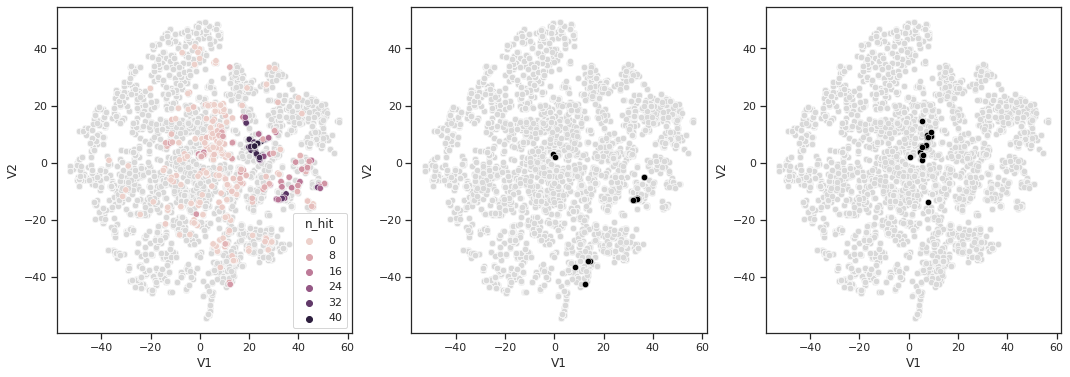

In [19]:
top_fungicidals_anno_df = pd.read_csv('../data/top30_fungicidal_inchikeys_spitzer.csv')
a_muciniphilia_anno_df = pd.read_csv('../data/amuciniphilia_inchikeys_df.csv')

sns.set(rc={"figure.figsize":(18, 6)})
sns.set_theme(style="ticks")

fig, ax =plt.subplots(1,3)
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data.dropna(), s=40, hue='n_hit',ax=ax[0])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(top_fungicidals_anno_df['InChiKey'])], s=40, color="0", ax=ax[1])
sns.scatterplot(x='V1', y='V2', data=p_data, s=40, color=".85", ax=ax[2])
sns.scatterplot(x='V1', y='V2', data=p_data[p_data.index.isin(a_muciniphilia_anno_df['InChiKeys'])], s=40, color="0", ax=ax[2])
fig.show()

In [22]:
m1_sign_foodb_df.iloc[:,0:4]

,SMILES,food_name,food_subgroup,food_group
InChiKey,,,,
AAARRLVSWMMLIL-JFDCHTIYSA-N,CC/C=C\C/C=C\C/C=C\C/C=C\CCCCCCC(=O)OC[C@H](CO...,Bison,Bovines,Animal foods
AAAUQAJYMBAEDN-SDYYSCIWSA-N,CC/C=C\C/C=C\C/C=C\C/C=C\CCCCCCC(=O)OC[C@H](CO...,Bison,Bovines,Animal foods
AAAVAOYFDZROJH-ODEQYEIHSA-N,CCCCCCCCCCCCCCCCC(=O)OC[C@@H](COC(=O)CCCCCCCCC...,Bison,Bovines,Animal foods
AAAYFFAGXKLUDV-AXAMJWTMSA-N,CC(C)CCCCCCCCCCCCCCCCCC(=O)OC[C@H](COC(=O)CCCC...,Bison,Bovines,Animal foods
AABORWYRSOFPIQ-NTOMMRJQSA-N,CCCCCCCCCCCCCCCCCCC(=O)OC[C@@H](COC(=O)CCCCCCC...,Bison,Bovines,Animal foods
...,...,...,...,...
DXYUAIFZCFRPTH-UHFFFAOYSA-N,COc1cc2c(=O)c(-c3ccc(O)cc3)coc2cc1O,Albacore tuna,Fishes,Aquatic foods
GOMNOOKGLZYEJT-UHFFFAOYSA-N,O=c1c(-c2ccccc2)coc2ccccc12,Albacore tuna,Fishes,Aquatic foods
IKGXIBQEEMLURG-NVPNHPEKSA-N,C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](Oc3c(-c4ccc(O)...,Berry wine,Fermented beverages,Beverages


In [25]:
p_data.index.name = "InChiKey"

In [32]:
p_data.drop(['InChiKey'], axis=1, inplace=True)

In [29]:
m1_sign_foodb_df

,SMILES,food_name,food_subgroup,food_group,0,1,2,3,4,5,...,118,119,120,121,122,123,124,125,126,127
InChiKey,,,,,,,,,,,,,,,,,,,,,
AAARRLVSWMMLIL-JFDCHTIYSA-N,CC/C=C\C/C=C\C/C=C\C/C=C\CCCCCCC(=O)OC[C@H](CO...,Bison,Bovines,Animal foods,0.073053,0.139665,0.044674,0.046085,-0.117927,-0.024912,...,-0.080349,0.111526,-0.116701,-0.061369,0.023871,-0.018069,-0.070172,-0.075896,0.078339,0.083088
AAAUQAJYMBAEDN-SDYYSCIWSA-N,CC/C=C\C/C=C\C/C=C\C/C=C\CCCCCCC(=O)OC[C@H](CO...,Bison,Bovines,Animal foods,0.076405,0.145628,0.056373,0.034627,-0.121586,-0.031722,...,-0.078279,0.108508,-0.122104,-0.044624,0.037099,-0.014882,-0.069048,-0.081330,0.082825,0.077184
AAAVAOYFDZROJH-ODEQYEIHSA-N,CCCCCCCCCCCCCCCCC(=O)OC[C@@H](COC(=O)CCCCCCCCC...,Bison,Bovines,Animal foods,0.055829,0.147009,0.129916,-0.110976,-0.122010,0.099818,...,-0.010028,0.078944,-0.064740,-0.083554,0.118771,0.030269,-0.076218,-0.061617,0.072870,0.041774
AAAYFFAGXKLUDV-AXAMJWTMSA-N,CC(C)CCCCCCCCCCCCCCCCCC(=O)OC[C@H](COC(=O)CCCC...,Bison,Bovines,Animal foods,-0.011707,0.195780,0.113601,-0.132519,-0.154273,0.127182,...,-0.010400,0.122413,-0.114583,-0.052965,0.096500,0.078779,-0.010993,-0.024884,0.133609,-0.061050
AABORWYRSOFPIQ-NTOMMRJQSA-N,CCCCCCCCCCCCCCCCCCC(=O)OC[C@@H](COC(=O)CCCCCCC...,Bison,Bovines,Animal foods,0.033798,0.113440,0.112800,-0.111409,-0.097554,0.110651,...,0.039030,0.064979,-0.051109,-0.063508,0.111846,0.095208,-0.036123,-0.037887,0.071598,0.042319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DXYUAIFZCFRPTH-UHFFFAOYSA-N,COc1cc2c(=O)c(-c3ccc(O)cc3)coc2cc1O,Albacore tuna,Fishes,Aquatic foods,0.137126,-0.133096,0.028303,0.127341,-0.037321,0.084817,...,0.019759,-0.107500,0.032461,0.121643,0.023270,0.096302,0.145283,-0.041256,0.021053,-0.136005
GOMNOOKGLZYEJT-UHFFFAOYSA-N,O=c1c(-c2ccccc2)coc2ccccc12,Albacore tuna,Fishes,Aquatic foods,0.118486,-0.116086,0.027692,0.119243,0.079645,0.040934,...,0.034543,-0.017068,-0.074567,0.100641,0.046507,0.119131,0.155060,0.009742,-0.028248,-0.151401
IKGXIBQEEMLURG-NVPNHPEKSA-N,C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](Oc3c(-c4ccc(O)...,Berry wine,Fermented beverages,Beverages,0.130026,-0.123017,0.101434,-0.096481,-0.072442,-0.013023,...,-0.089762,-0.121738,0.122492,0.112889,-0.005910,0.103565,0.087939,-0.099322,-0.076077,-0.026943


In [34]:
p_data = p_data.merge(m1_sign_foodb_df.iloc[:,0:4], on='InChiKey', how='left')

In [35]:
p_data.to_csv("../data/foob_db_projection_annotated.csv")